In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
df = pd.read_csv("dataset/housing_clean.csv")
df = df.drop(columns=["Unnamed: 0"])

# Separate features and labels
X = df.drop(columns=["price"]).values
y = df["price"].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
X_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [25]:
class HousePriceModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

In [26]:
input_dim = X_train.shape[1]

model = HousePriceModel(input_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [27]:
epochs = 100

for epoch in range(epochs):
    # Forward Pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}, Loss: {loss.item():.4f}]')

Epoch [10/100, Loss: 0.3868]
Epoch [20/100, Loss: 0.2977]
Epoch [30/100, Loss: 0.2570]
Epoch [40/100, Loss: 0.2330]
Epoch [50/100, Loss: 0.2115]
Epoch [60/100, Loss: 0.1905]
Epoch [70/100, Loss: 0.1709]
Epoch [80/100, Loss: 0.1530]
Epoch [90/100, Loss: 0.1372]
Epoch [100/100, Loss: 0.1222]


In [28]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f"Total MSE: {test_loss.item():4f}")

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(predictions, y_test_tensor)
r2 = r2_score(predictions, y_test_tensor)

print(f"🔍 MSE: {mse}")
print(f"📈 R2 Score: {r2}")

Total MSE: 0.547228
🔍 MSE: 0.547227680683136
📈 R2 Score: 0.46674455303521833


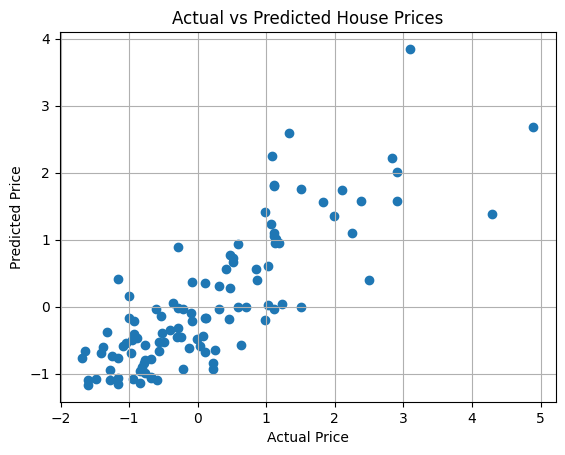

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test_tensor, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

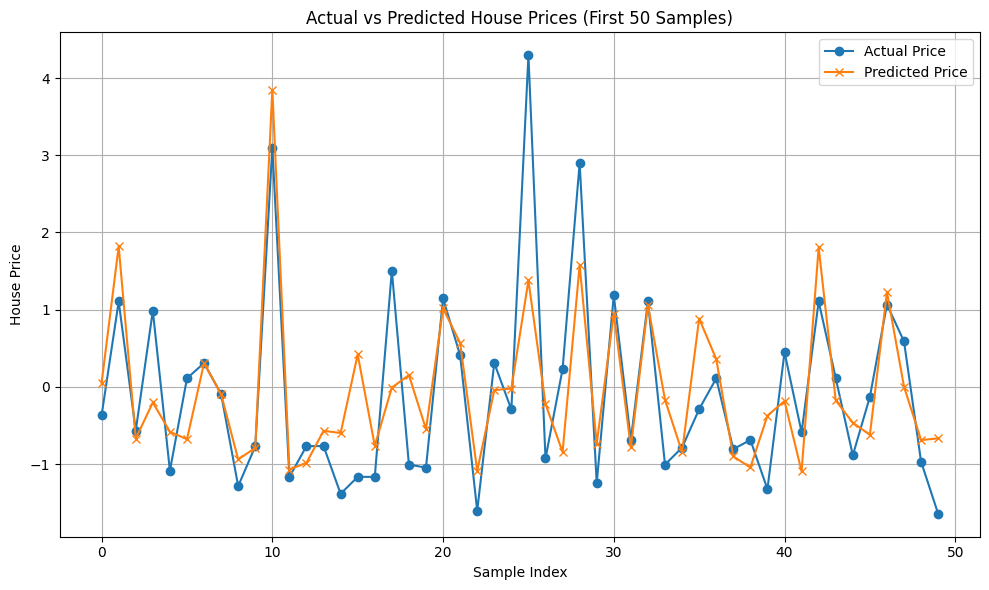

In [30]:
import matplotlib.pyplot as plt

# Plot first 50 actual vs predicted house prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_tensor[:50], label='Actual Price', marker='o')
plt.plot(predictions[:50], label='Predicted Price', marker='x')
plt.title('Actual vs Predicted House Prices (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
import matplotlib.pyplot as plt

loss_history = []
epochs = 100

for epoch in range(epochs):
    model.train()  # Ensure the model is in training mode
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.1080
Epoch [20/100], Loss: 0.0948
Epoch [30/100], Loss: 0.0835
Epoch [40/100], Loss: 0.0734
Epoch [50/100], Loss: 0.0645
Epoch [60/100], Loss: 0.0563
Epoch [70/100], Loss: 0.0497
Epoch [80/100], Loss: 0.0443
Epoch [90/100], Loss: 0.0411
Epoch [100/100], Loss: 0.0378


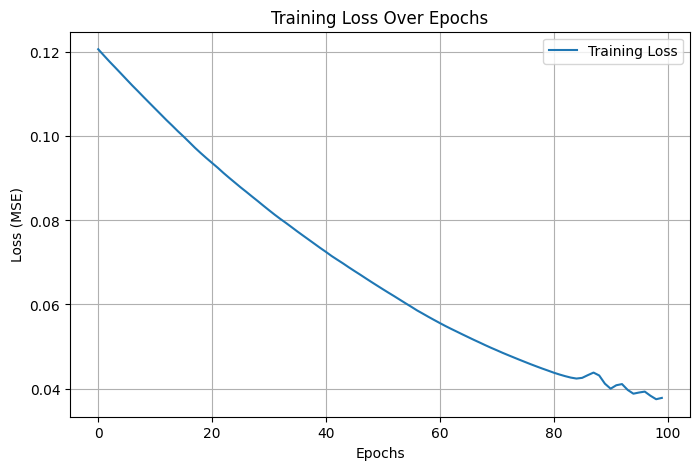

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f"Total MSE: {test_loss.item():4f}")

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(predictions, y_test_tensor)
r2 = r2_score(predictions, y_test_tensor)

print(f"🔍 MSE: {mse}")
print(f"📈 R2 Score: {r2}")

Total MSE: 0.589919
🔍 MSE: 0.5899187922477722
📈 R2 Score: 0.47492127919650495
